In [2]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [2]:
result = Results(varying_param="temperature", range=[1, 1.5])
params = ModelParameters(model = "blume", var_range=(0, 2), step=0.001, tol=1e-9, max_steps=int(10e9), use_prev=True, chi=12)
result.get(params, sweeping_param="coupling")

temperature=1: 100%|██████████| 2000/2000 [02:14<00:00, 14.89it/s]


Saving data in folder: '18-05 16:17'
Done 



temperature=1.5: 100%|██████████| 2000/2000 [06:30<00:00,  5.12it/s]  


Saving data in folder: '18-05 16:17'
Done 



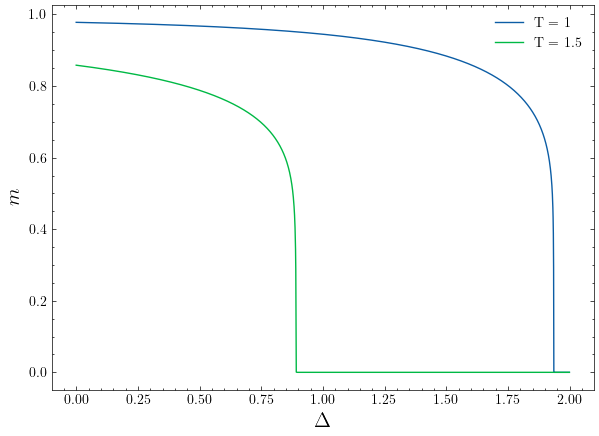

In [3]:
plt.figure(figsize = (7, 5))
for temp in [1, 1.5]:    
    data = read("18-05 16:17", f"temperature{temp}")
    plt.plot(data["couplings"], compute(Prop.m, data), label=f"T = {temp}")

plt.xlabel("$\Delta$", fontsize = 15)
plt.ylabel("$m$", fontsize = 15)
plt.legend()
plt.show()

In [26]:
result = Results(varying_param="chi", range=[4, 6, 10, 14, 20, 32])
params = ModelParameters(model = "blume", var_range=(1.95, 2.05), step=0.0001, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.5)
result.get(params, sweeping_param="coupling")

chi=4: 100%|██████████| 1000/1000 [00:24<00:00, 40.30it/s]


Saving data in folder: '21-05 16:46'
Done 



chi=6: 100%|██████████| 1000/1000 [00:25<00:00, 38.62it/s]


Saving data in folder: '21-05 16:46'
Done 



chi=10: 100%|██████████| 1000/1000 [00:29<00:00, 34.21it/s]


Saving data in folder: '21-05 16:46'
Done 



chi=14: 100%|██████████| 1000/1000 [00:35<00:00, 28.24it/s]


Saving data in folder: '21-05 16:46'
Done 



chi=20: 100%|██████████| 1000/1000 [00:46<00:00, 21.49it/s]


Saving data in folder: '21-05 16:46'
Done 



chi=32: 100%|██████████| 1000/1000 [02:37<00:00,  6.36it/s]


Saving data in folder: '21-05 16:46'
Done 



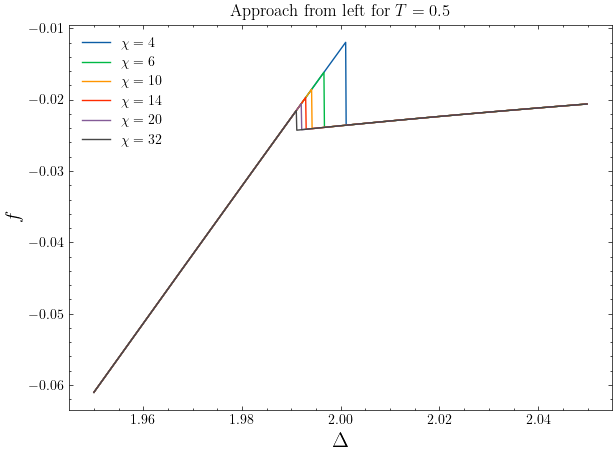

In [12]:
plt.figure(figsize = (7, 5))
for chi in [4, 6, 10, 14, 20, 32]:    
    data = read("21-05 16:46", f"chi{chi}")
    plt.plot(data["couplings"], compute(Prop.f, data), label=f"$\chi = {chi}$")

plt.xlabel("$\Delta$", fontsize = 15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()
plt.title("Approach from left for $T = 0.5$")
plt.show()

In [29]:
couplings = [coupling for coupling in np.arange(1.95, 2.05, 0.0001)]
couplings.reverse()

result = Results(varying_param="chi", range=[4, 6, 10, 14, 20, 32])
params = ModelParameters(model = "blume", var_range=couplings, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.5)
result.get(params, sweeping_param="coupling")

chi=4: 100%|██████████| 1000/1000 [00:25<00:00, 39.78it/s]


Saving data in folder: '21-05 16:54'
Done 



chi=6: 100%|██████████| 1000/1000 [00:25<00:00, 39.50it/s]


Saving data in folder: '21-05 16:54'
Done 



chi=10: 100%|██████████| 1000/1000 [00:28<00:00, 35.34it/s]


Saving data in folder: '21-05 16:54'
Done 



chi=14: 100%|██████████| 1000/1000 [00:34<00:00, 28.93it/s]


Saving data in folder: '21-05 16:54'
Done 



chi=20: 100%|██████████| 1000/1000 [00:46<00:00, 21.63it/s]


Saving data in folder: '21-05 16:54'
Done 



chi=32: 100%|██████████| 1000/1000 [02:39<00:00,  6.28it/s]


Saving data in folder: '21-05 16:54'
Done 



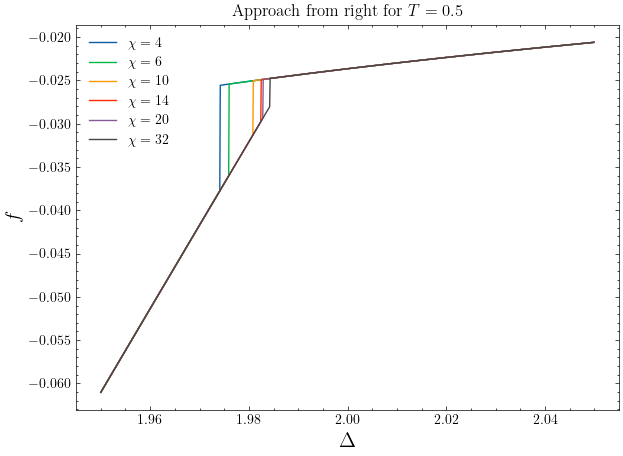

In [11]:
plt.figure(figsize = (7, 5))
for chi in [4, 6, 10, 14, 20, 32]:    
    data = read("21-05 16:54", f"chi{chi}")
    plt.plot(data["couplings"], compute(Prop.f, data), label=f"$\chi = {chi}$")

plt.xlabel("$\Delta$", fontsize = 15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()
plt.title("Approach from right for $T = 0.5$")
plt.show()

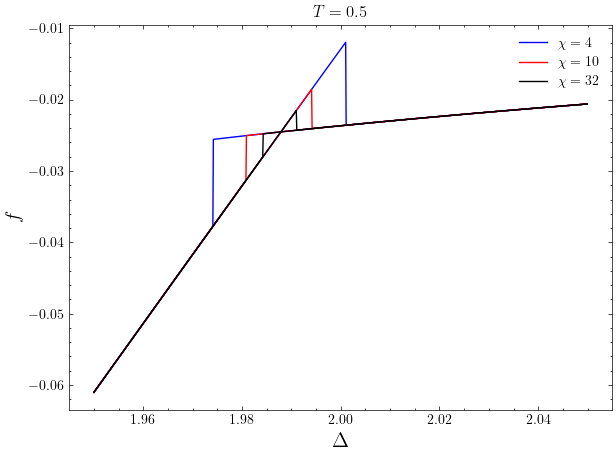

In [9]:
plt.figure(figsize = (7, 5))
colors = ["b-", "r-", "k-"]
for idx, chi in enumerate([4, 10, 32]):    
    data_inv = read("21-05 16:54", f"chi{chi}")
    data = read("21-05 16:46", f"chi{chi}")
    plt.plot(data["couplings"], compute(Prop.f, data), colors[idx], label=f"$\chi = {chi}$")
    plt.plot(data_inv["couplings"], compute(Prop.f, data_inv), colors[idx])

plt.title("$T = 0.5$")
plt.xlabel("$\Delta$", fontsize = 15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()
plt.show()

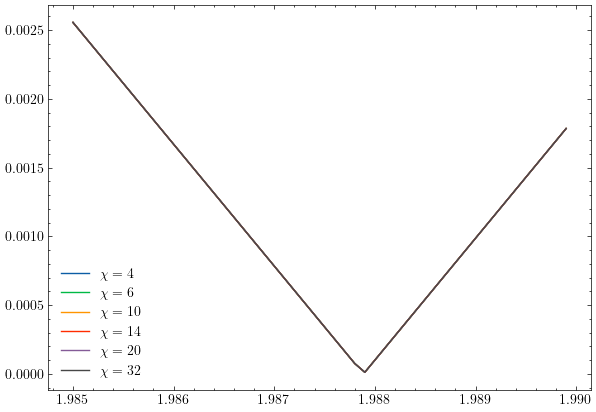

In [14]:
plt.figure(figsize = (7, 5))
deltas_c = []
for chi in [4, 6, 10, 14, 20, 32]:    

    inv_data = read("21-05 16:54", f"chi{chi}")
    data = read("21-05 16:46", f"chi{chi}")
    free_energies = compute(Prop.f, data)
    inv_free_energies = compute(Prop.f, inv_data)

    inv_free_energies.reverse()
    subtracted = [abs(el1 - el2) for (el1, el2) in zip(free_energies, inv_free_energies)]
    subtracted = subtracted[350:400]
    couplings = data["couplings"][350:400]

    idx = subtracted.index(min(subtracted))
    deltas_c.append(couplings[idx])
    plt.plot(couplings, subtracted, label = f"$\chi = {chi}$")
plt.legend()
plt.show()

In [15]:
deltas_c[0]

1.9878999999999958

In [25]:
result = Results()
params = ModelParameters(model = "blume", var_range=(1.95, 2.05), step=0.0001, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.4, chi=12)
result.get(params, sweeping_param="coupling")

100%|██████████| 1000/1000 [00:23<00:00, 42.98it/s]


Saving data in folder: '22-05 11:24'
Done 



In [24]:
couplings = [coupling for coupling in np.arange(1.95, 2.05, 0.0001)]
couplings.reverse()

result = Results()
params = ModelParameters(model = "blume", var_range=couplings, step=0.0001, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.4, chi= 12)
result.get(params, sweeping_param="coupling")

100%|██████████| 1000/1000 [00:24<00:00, 41.31it/s]


Saving data in folder: '22-05 11:23'
Done 



In [44]:
data_inv = read("22-05 11:23", f"data")
data = read("22-05 11:24", f"data")
free_energies = compute(Prop.f, data)
inv_free_energies = compute(Prop.f, data_inv)
inv_free_energies.reverse()
subtracted = [abs(el1 - el2) for (el1, el2) in zip(free_energies, inv_free_energies)]
subtracted = subtracted[425:500]
couplings = data["couplings"][425:500]
idx = subtracted.index(min(subtracted))

In [45]:
couplings[idx]

1.9967999999999948

In [55]:
result = Results()
params = ModelParameters(model = "blume", var_range=(1.95, 2.05), step=0.0001, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.3, chi=12)
result.get(params, sweeping_param="coupling")

100%|██████████| 1000/1000 [00:18<00:00, 55.20it/s]


Saving data in folder: '22-05 15:39'
Done 



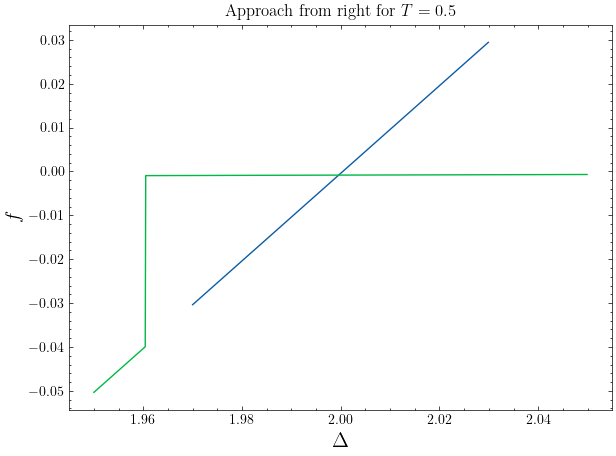

In [57]:
inv_data = read("22-05 15:38", f"data")
data = read("22-05 15:39", f"data")
plt.figure(figsize= (7, 5))
plt.plot(data["couplings"][200:800], compute(Prop.f, data)[200:800])
plt.plot(inv_data["couplings"][200:800], compute(Prop.f, inv_data)[200:800])

plt.xlabel("$\Delta$", fontsize = 15)
plt.ylabel("$f$", fontsize = 15)

plt.title("Approach from right for $T = 0.5$")
plt.show()